In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import import_in_df
import numpy as np

sns.set_theme(style="darkgrid")

## Random Features

In [30]:
dfs = import_in_df('./new_activations/rf_synthetic/', 'softplus')
dfc = import_in_df('./new_activations/rf_synthetic/', 'cos')

dfms = import_in_df('./new_activations/rf_mnist/', 'softplus')
dfmc = import_in_df('./new_activations/rf_mnist/', 'cos')

dfcs = import_in_df('./new_activations/rf_cifar10/', 'softplus')
dfcc = import_in_df('./new_activations/rf_cifar10/', 'cos')

dfm = pd.concat([dfms, dfmc]).reset_index(drop=True)
dfc_ = pd.concat([dfcs, dfcc]).reset_index(drop=True)

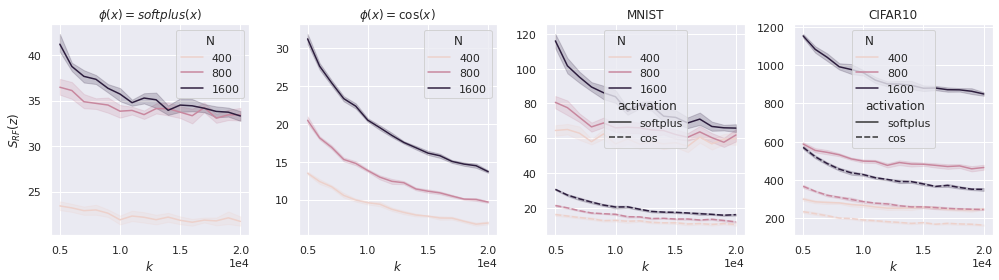

In [31]:
fig, ax = plt.subplots(1, 4, figsize=(14, 4))


sns.lineplot(x='k', y='S', hue='N', data=dfs, ax=ax[0])
sns.lineplot(x='k', y='S', hue='N', data=dfc, ax=ax[1])

sns.lineplot(x='k', y='S', hue='N', style='activation', data=dfm, ax=ax[2])
sns.lineplot(x='k', y='S', hue='N', style='activation', data=dfc_, ax=ax[3])



ax[0].set_title(r'$\phi(x) = softplus(x)$')
ax[1].set_title(r'$\phi(x) = \cos(x)$')

ax[0].set_xlabel(r'$k$')
ax[1].set_xlabel(r'$k$')

ax[0].set_ylabel(r'$S_{RF}(z)$')
ax[1].set_ylabel('')

ax[0].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))
ax[1].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))


ax[2].set_title('MNIST')
ax[2].set_xlabel(r'$k$')
ax[2].set_ylabel('')
ax[2].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))

ax[3].set_title('CIFAR10')
ax[3].set_xlabel(r'$k$')
ax[3].set_ylabel('')
ax[3].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))


fig.tight_layout()
fig.savefig('rf_new_act.pdf')

## NTK

In [32]:
dfs = import_in_df('./new_activations/ntk_synthetic/', 'softplus')
dfc = import_in_df('./new_activations/ntk_synthetic/', 'cos')

dfs['p'] = dfs['k'].apply(lambda x: 1000 * x)
dfc['p'] = dfc['k'].apply(lambda x: 1000 * x)

dfms = import_in_df('./new_activations/ntk_mnist/', 'softplus')
dfmc = import_in_df('./new_activations/ntk_mnist/', 'cos')

dfcs = import_in_df('./new_activations/ntk_cifar10/', 'softplus')
dfcc = import_in_df('./new_activations/ntk_cifar10/', 'cos')

dfm = pd.concat([dfms, dfmc]).reset_index(drop=True)

dfc_ = pd.concat([dfcs, dfcc]).reset_index(drop=True)
dfc_ = dfc_.loc[dfc_['k'] <= 435]

dfm['p'] = dfm['k'].apply(lambda x: 784 * x)
dfc_['p'] = dfc_['k'].apply(lambda x: 3072 * x)

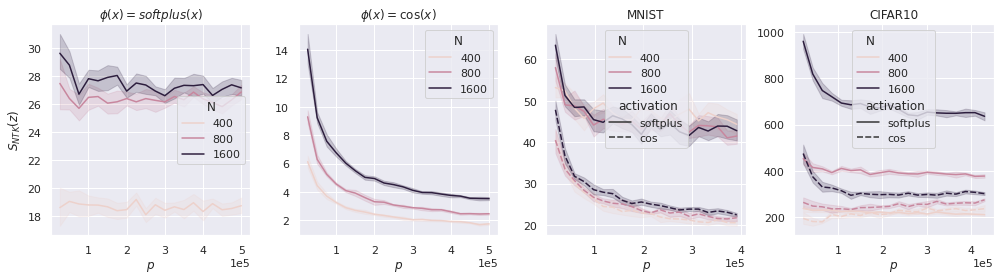

In [33]:
fig, ax = plt.subplots(1, 4, figsize=(14, 4))


sns.lineplot(x='p', y='S', hue='N', data=dfs, ax=ax[0])
sns.lineplot(x='p', y='S', hue='N', data=dfc, ax=ax[1])

ax[0].set_title(r'$\phi(x) = softplus(x)$')
ax[1].set_title(r'$\phi(x) = \cos(x)$')

ax[0].set_xlabel(r'$p$')
ax[1].set_xlabel(r'$p$')

ax[0].set_ylabel(r'$S_{NTK}(z)$')
ax[1].set_ylabel('')

ax[0].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))
ax[1].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))


sns.lineplot(x='p', y='S', hue='N', style='activation', data=dfm, ax=ax[2])
sns.lineplot(x='p', y='S', hue='N', style='activation', data=dfc_, ax=ax[3])


ax[2].set_title('MNIST')
ax[2].set_xlabel(r'$p$')
ax[2].set_ylabel('')
ax[2].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))


ax[3].set_title('CIFAR10')
ax[3].set_xlabel(r'$p$')
ax[3].set_ylabel('')
ax[3].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))



fig.tight_layout()
fig.savefig('ntk_new_act.pdf')